# 実習2.1：for文による繰り返し

In [1]:
import numpy as np

# 整数5個を要素にもつリストを作成
values=[3,1,0,1,1]

# リストからNumpy配列を作成
a=np.array(values)

print(f'配列の要素数: {len(a)}')

print('インデックス 要素の値')
# iは0から開始。iがlen(a)未満の間、ブロック内の処理を繰り返す。
# 1回の処理を終えたら、iの値は1増える
for i in range(len(a)):
    print(f'{i} {a[i]}') # 空白で区切るなら、print(i, a[i])という書き方もできる


配列の要素数: 5
インデックス 要素の値
0 3
1 1
2 0
3 1
4 1


# 実習2.2：配列のブロードキャストによる加算

In [2]:
# 整数5個を要素にもつリストを作成
values=[3,8,1,4,6]

# リストからNumpy配列を作成
a=np.array(values)

# 配列aの各要素に1を足し、結果を変数bに代入
b=a+1;

for i in range(len(a)):
    print(f'{a[i]} {b[i]}')

3 4
8 9
1 2
4 5
6 7


# 実習2.3：ブーリアンに対する演算

In [3]:
b1=True+True
print(b1)

b2=True+False
print(b2)

b3=False+True
print(b3)

b4=False+False
print(b4)

b5=True*1
print(b5)

2
1
1
0
1


# 実習2.4：配列の各要素に対する比較演算

In [4]:
# 整数5個を要素にもつリストを作成
values=[3,1,0,1,1]

# リストからNumpy配列を作成
a=np.array(values)

# 各要素の値が1より大きいか判定する
c=(a>1)

print('aの要素値 bの要素値')
for i in range(len(a)):
    print(f'{a[i]} {c[i]}')

aの要素値 bの要素値
3 True
1 False
0 False
1 False
1 False


# 実習2.5：値が1より大きい要素を数える

In [5]:
n=np.sum(c) # 配列の要素値を合計して、変数nに代入
print(f'値が1より大きい要素数は{n}です。')

値が1より大きい要素数は1です。


# 実習2.6：関数の定義

In [6]:
def calc(x,y,z):
    a=x+y
    b=x-y
    return a*b

#関数の外
a=1
b=2
c=3
d=calc(a,b,c)
print('d =',d)

e=calc(100,-100,1)
print('e =',e)

d = -3
e = 0


# 実習2.7：if文

In [7]:
# 入力を促す文字列を渡してinput関数を呼び出す。
# キーボードからの入力すると、その値がinput関数から返却されるので
# 変数ageに代入。
age=input('年齢を整数を入力してください： ')

# input関数の戻り値の型はstr型。
# 整数に変換するために、int関数に渡す。
# int関数の戻り値は整数(int)。
age=int(age)

if age>=18: # 変数ageの値が18以上かを判定
    print('成人です')

年齢を整数を入力してください： 1


# グラフで2バイト文字を使うためのライブラリのインストール

In [8]:
!pip install japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 65.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=8c8be763ca26e215abbccb743cff694d20992c0ebfa1a042209d88cda13cc9b6
  Stored in directory: /root/.cache/pip/wheels/91/8f/c2/83055ad0c9591b0a094730aa7cb2cc12fedacbcd2241baf534
Successfully built japanize_matplotlib


# 関数 save_fig：図の保存用

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt

def save_fig(plt, file_prefix):
    if file_prefix == '':
        return
    
    parent = os.path.dirname(os.path.abspath(file_prefix))
    os.makedirs(parent, exist_ok=True)
    plt.savefig(f'{file_prefix}.pdf', transparent=True, bbox_inches='tight', pad_inches = 0)
    plt.savefig(f'{file_prefix}.png', transparent=True, dpi=300, bbox_inches='tight', pad_inches = 0)

# 関数 show_data1：体温とクラスを可視化する

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

X_col = ['cornflowerblue', 'gray']
X_labels = ['非感染者(0)', '感染者(1)']

def show_data1(x, t, x0=None, file_prefix=''):
    K = np.max(t) + 1
    fig = plt.figure(figsize=(5,5))

    for k in range(K):
        plt.plot(x[t==k], t[t==k], X_col[k], alpha=0.5,
                 linestyle='none', marker='o', markersize=10, label=X_labels[k])

    plt.grid(True)
    plt.ylim(-0.5, 1.5)
    
    if x0 is not None:
        plt.plot(np.repeat(x0, 100), np.linspace(-0.5, 1.5, 100), 
                 linestyle='dashed', color='black', label=f'x={x0:.2f}')
        
    plt.xticks(fontsize=14)
    plt.xlabel('体温 (${}^{\circ}$C)', fontsize=14)
    plt.ylabel('感染状態(クラス)', fontsize=14)
    plt.yticks([0, 1], fontsize=14)
    plt.legend(fontsize=14, loc='lower right')
    plt.tight_layout()
    save_fig(plt, file_prefix=file_prefix)
    plt.show()

# 実習2.8：教師データの生成

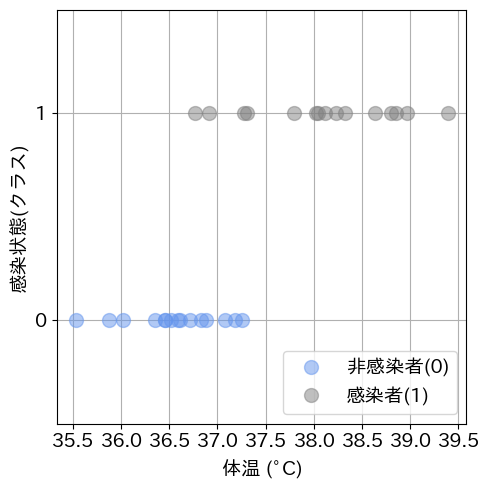

In [11]:
import random
import sklearn.datasets

random.seed(0) # 発生させる乱数列を固定する

# 体温xとクラス(0または1)のデータを生成する。
# xに体温の値を持つ配列、yにクラスの値を持つ配列が代入される
x,y=sklearn.datasets.make_blobs(n_samples=30, # 生成するデータ数
                                n_features=1, # 成分数
                                centers=2, # クラス数
                                cluster_std=0.6, # 各クラスの体温のばらつき（標準偏差）
                                center_box=(38.0,36.0), # 各クラスの中心
                                random_state=10) # 発生させる乱数列を固定する

# 関数に体温xと正解クラスyの配列を渡して可視化する
show_data1(x,y)

# 実習2.9：データ数と配列の形状確認

In [12]:
n=len(x)
print(f'データ数: {n}')

print(f'体温の配列xの形状: {x.shape}')
print(f'クラスの配列yの形状: {y.shape}')

データ数: 30
体温の配列xの形状: (30, 1)
クラスの配列yの形状: (30,)


# 実習2.10：クラス0（非感染者）の数を調べる

In [13]:
# 配列yの各要素について、0に等しいか判定し、
# 結果を変数is_0に代入
is_0=(y==0)
for i in range(len(y)):
    print(y[i],is_0[i])

# 配列yについて、値が0に等しい要素数を集計
# 実習2.4と2.5を参照
n0=np.sum(y==0)
print(f'クラス0（非感染者数） = {n0}')

1 False
0 True
0 True
1 False
1 False
0 True
1 False
1 False
0 True
0 True
0 True
1 False
0 True
1 False
0 True
0 True
0 True
0 True
0 True
1 False
1 False
0 True
1 False
0 True
1 False
0 True
1 False
1 False
1 False
1 False
クラス0（非感染者数） = 15


# 実習2.11：クラス1（感染者）の数を調べる

In [14]:
# 配列yの各要素について、1に等しいか判定し、
# 結果を変数is_1に代入
is_1=(y==1)
for i in range(len(y)):
    print(y[i],is_1[i])

# 配列yについて、値が1に等しい要素数を集計
# 実習2.4と2.5を参照
n1=np.sum(y==1)
print(f'クラス1（非感染者数） = {n1}')

1 True
0 False
0 False
1 True
1 True
0 False
1 True
1 True
0 False
0 False
0 False
1 True
0 False
1 True
0 False
0 False
0 False
0 False
0 False
1 True
1 True
0 False
1 True
0 False
1 True
0 False
1 True
1 True
1 True
1 True
クラス1（非感染者数） = 15


# 実習2.12：1次元入力のニューロンを実装する

In [15]:
def neuron(w0,w1,x):
    """入力総和を計算する。

    Args:
        w0 (float): 重み
        w1 (float): バイアス
        x (float or ndarray): 体温データ
    
    Returns:
        float or ndarray:　入力総和
    """
    # ブロードキャストによる演算
    # 配列xの各要素に、スカラーw0を掛ける。
    # さらにスカラーw1を足す
    # 配列uとxの形状は同じ
    u=w0*x+w1
    return u

# 実習2.13：シグモイド関数を実装する

In [16]:
def sigmoid(u):
    """入力総和uについてシグモイド関数の値を計算する。

    Args:
        u (float or ndarray): 入力総和
    
    Returns:
        float or ndarray:　シグモイド関数の値
    """
    # np.expはユニバーサル関数。uの各要素u[i]について、exp(-u[i])が計算される。
    # 返される配列の形状はuと同じ。
    return 1/(1+np.exp(-u))

# 実習2.14：体温から「感染者」である条件付き確率を予測する

In [47]:
w0=2.8 # バイアス
w1=-104.2 # 重み

# 各体温の値に対して入力総和を計算
u=neuron(w0,w1,x)

# 入力総和から感染者である条件付き確率を計算
y_pred=sigmoid(u)

print(f'予測した条件付き確率y_predの形状: {y_pred.shape}')

# 1次元配列へ変形
y_pred=y_pred.flatten()

print(f'形状を変形したy_predの形状: {y_pred.shape}')

予測した条件付き確率y_predの形状: (30,)
形状を変形したy_predの形状: (30,)


# 実習2.15：条件付き確率からクラスラベルを決定

In [48]:
# y_predの各要素について
# 0.5以上の値をTrue、それ以外をFalseと判定し、
# 結果を配列c_predに代入する。
c_pred=(y_pred>=0.5)

# c_predに1を掛けて、整数（クラスラベル）へ変換
labels=c_pred*1

# 体温を2次元配列から1次元配列へ変形
x=x.flatten()

print('インデックス　体温　予測確率　予測ラベル　正解ラベル')
for i in range(len(x)):
    print(f'{i} {x[i]} {y_pred[i]} {y[i]}')

インデックス　体温　予測確率　予測ラベル　正解ラベル
0 37.79574730850173 0.8359081578460645 1
1 36.45232840350939 0.10588503148440856 0
2 36.35259858711074 0.08220756302644341 0
3 36.91247272374186 0.30046671941179165 1
4 37.31061316981003 0.5670233969857489 1
5 37.07432316025613 0.4032611649814384 0
6 38.32641861219698 0.9574654159596041 1
7 38.01798563078235 0.9046815632755656 1
8 36.717174427438664 0.19910275564258173 0
9 36.61666566488178 0.15797989170151205 0
10 35.530118538199744 0.008874421518413354 0
11 38.797293927537346 0.9882539536197583 1
12 36.45993357202693 0.1079180364676985 0
13 36.771859132886455 0.22464590271288307 1
14 36.830160297800795 0.2543488400238728 0
15 36.02530737703517 0.034584955070371355 0
16 35.878319311156446 0.02318694396364949 0
17 37.256310615944216 0.5293835348785902 0
18 36.88652609810555 0.2854212752402384 0
19 39.389476499707854 0.9977409159575558 1
20 38.962069429265895 0.9925627893017873 1
21 36.5945367915413 0.14991129075315368 0
22 38.03957822835038 0.9097691122146092

# 実習2.16：正解率の計算

In [49]:
correct=0 # 正解クラスラベルと一致した予測クラスラベル数
for i in range(len(y)):
    if y[i]==labels[i]: # 実習2.7参照
        correct+=1

print(f'正しく予測できた個数 = {correct}')
print(f'正解率 = {100*correct/len(y)}')

正しく予測できた個数 = 27
正解率 = 90.0


# 実習2.17：データの分布と決定境界を表示する

決定境界の値 = 37.214285714285715
決定境界における条件付き確率P(t=1|x=x0) = 0.5


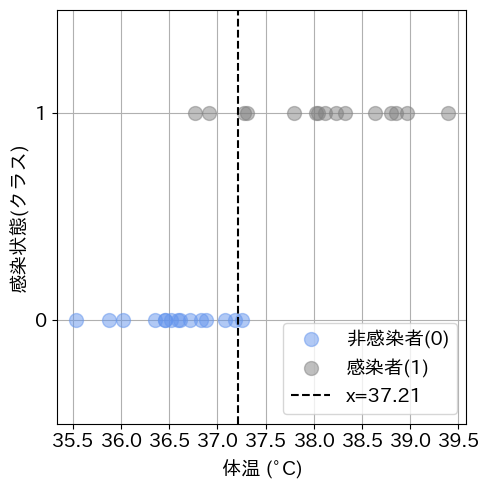

In [50]:
# 決定境界x0の値（スカラー）を計算
# 授業資料参照
x0=-w1/w0

print(f'決定境界の値 = {x0}')

# 体温x0について入力総和を計算
u=neuron(w0,w1,x0)

# 入力総和を使い、体温x0のとき感染者(t=1)である
# 条件付き確率P(t=1|x=x0)を計算
p=sigmoid(u)
print(f'決定境界における条件付き確率P(t=1|x=x0) = {p}')

# データ分布に決定境界を重ねて描画
show_data1(x,y,x0)

# おまけ：シグモイド関数による条件付き確率P(t=1|x)をプロット

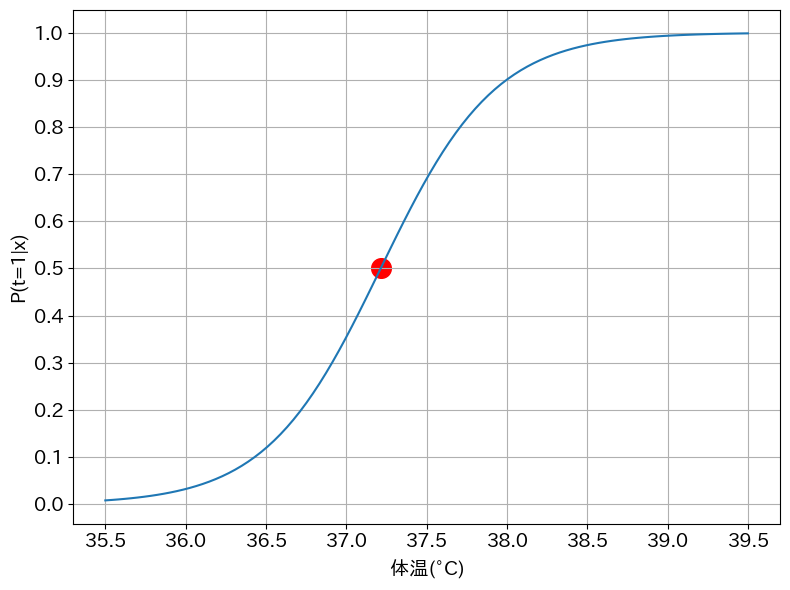

In [51]:
# プロットするX軸の範囲
# 35.5以上39.5以下の範囲で等間隔に100個の点を生成
xs = np.linspace(35.5, 39.5, 100)

# xsの各要素に対して、入力総和を計算
us = neuron(w0, w1, xs)

# 入力総和usの値に対して、条件付き確率P(t=1|x)を計算
ys = sigmoid(us)

# 決定境界x0についての条件付き確率P(t=1|x=x0)を計算
u0 = neuron(w0, w1, x0)
p = sigmoid(u0)

plt.figure(figsize=(8, 6))

# 条件付き確率P(t=1|x)を描画
plt.plot(xs, ys)

# 決定境界x0についての条件付き確率P(t=1|x=x0)を点で描画
plt.scatter(x0, p, s=200, color='red')

plt.xticks(fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=14)
plt.xlabel('体温(${}^{\circ}$C)', fontsize=14)
plt.ylabel('P(t=1|x)', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()